<a href="https://colab.research.google.com/github/tommyliverani/RulFramework/blob/main/Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RUL FRAMEWORK



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from Model import Model
from Dataset import Dataset
from Framework import Rul_Framework

##EXAMPLE: anomaly prediction

Each row of the dataset contains this fields:
*  node: the node's name
*  some features that describe the state of the node
*  is_rising_anomaly: can be 0 or 1

The library can compute the rul field counting the number of rows beetwin the selected row and the next anomaly.
Obviously if is_rising_anomaly is 1 rul is 0.


##0 - BEFORE STARTING

Before using the library It's important to delete from the dataset the rows for which the rul field can't be computed. Example:

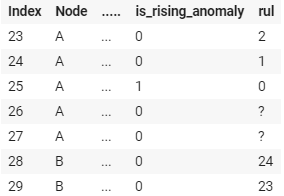

For rows number 26 and 27 the rul field can't be computed and must be deleted.


In [2]:
def select_rul(data):
    last_node=data['node'][0]
    last_anomaly=0
    for index,row in data.iterrows():
        if data['is_rising_anomaly'][index]==1:
            last_anomaly=index
        if last_node != data['node'][index]:
            for i in range(last_anomaly+1,index):
                data=data.drop(i)
        last_node = data['node'][index]
    for i in range(last_anomaly,data.index[-1]):
                data=data.drop(i+1)
    return data

In [3]:
url = 'https://raw.githubusercontent.com/tommyliverani/ExamonDataExtraction/master/examon-client-feature-newapi_py3/'

data= pd.read_csv(url + 'final_data/final_data_full.csv')
data= select_rul(data)

#features used as input
dt_in=dt_in = list(data.columns[2:-3])

## 1 - INIT

Rul_framework(input_features, rul_feature, full_data)

- input_features: features used as input
- rul_feature: feature used to compute rul
- full_data: dataset

In [4]:
framework=Rul_Framework(dt_in,'is_rising_anomaly',data)

##2 - BUILDING THE NETWORK

- build_net([[nodes,activation],..],optimizer='Adam',loss='mae')

Alternatively you can import a network

- import_model(network)

In [5]:
framework.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']])

## 3 - TRAINING AND EVALUATING THE MODEL

RUL ESTIMATION WITH TRANSFER

Used to performe transfer learning on the given data.
In our example we split the dataset using 8 nodes for the training set and 2 nodes for the test set.

rul_estimation_with_transfer(feature,ratio,batch_size=10, validation_split=0.2, epochs=20, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

- feature: feature used to split the dataset
- ratio: ratio used to split the dataset

In [6]:
framework.rul_estimation_with_transfer('node',0.8)

/content/Dataset.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][i]=index-i
/content/Dataset.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][index]=self.full_data['rul'][index]*1.0/max


Epoch 1/20
5857/5857 [==============================] - 11s 2ms/step - loss: 0.1178 - val_loss: 0.1197
Epoch 2/20
5857/5857 [==============================] - 10s 2ms/step - loss: 0.0617 - val_loss: 0.1240
Epoch 3/20
5857/5857 [==============================] - 12s 2ms/step - loss: 0.0461 - val_loss: 0.1103
Epoch 4/20
5857/5857 [==============================] - 12s 2ms/step - loss: 0.0397 - val_loss: 0.1194
Epoch 5/20
5857/5857 [==============================] - 11s 2ms/step - loss: 0.0358 - val_loss: 0.1208


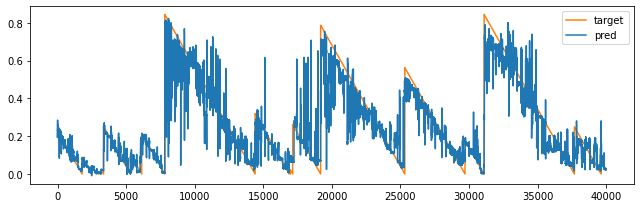

In [7]:
framework.print_prediction_on_training(40000)

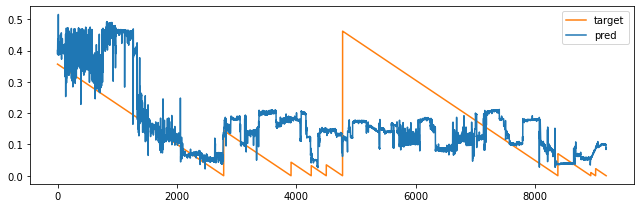

In [8]:
framework.print_prediction_on_test(40000)

In [9]:
mae=framework.mae_on_trainining()
print(f'{mae}')
mae=framework.mae_on_test()
print(f'{mae}')

0.061722688376903534
0.10488314181566238


##RUL ESIMATION

Used to performe rul estimation without transfer learning on the given data.
So we first shuffle the data and we split the data with 0.8 as ratio.

In [10]:
framework.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']])
framework.rul_estimation(0.8)

/content/Dataset.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][i]=index-i
/content/Dataset.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][index]=self.full_data['rul'][index]*1.0/max


Epoch 1/20
5274/5274 [==============================] - 10s 2ms/step - loss: 0.1116 - val_loss: 0.0691
Epoch 2/20
5274/5274 [==============================] - 10s 2ms/step - loss: 0.0661 - val_loss: 0.0586
Epoch 3/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.0521 - val_loss: 0.0497
Epoch 4/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.0447 - val_loss: 0.0402
Epoch 5/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.0394 - val_loss: 0.0421
Epoch 6/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.0360 - val_loss: 0.0375
Epoch 7/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.0331 - val_loss: 0.0336
Epoch 8/20
5274/5274 [==============================] - 10s 2ms/step - loss: 0.0311 - val_loss: 0.0293
Epoch 9/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.0302 - val_loss: 0.0352
Epoch 10/20
5274/5274 [==============================] - 9s 2ms/step - loss: 0.

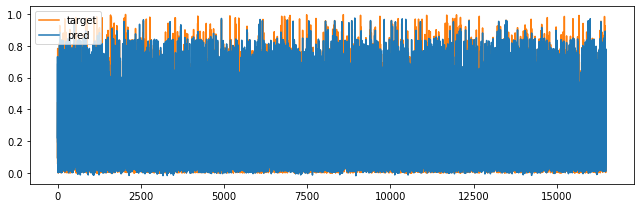

In [11]:
framework.print_prediction_on_test(40000)

In [12]:
mae=framework.mae_on_trainining()
print(f'{mae}')
mae=framework.mae_on_test()
print(f'{mae}')

0.026503775268793106
0.02673136442899704


This graph is not significant as the data is shuffled.

We can print prediction on another set passed as parameter.


In [13]:
url = 'https://raw.githubusercontent.com/tommyliverani/RulPrediction/main/data/'
test_set = pd.read_csv(url + 'test_set.csv')

In [14]:
mae=framework.mae_on_set(test_set)
print(f'{mae}')

0.025050906464457512


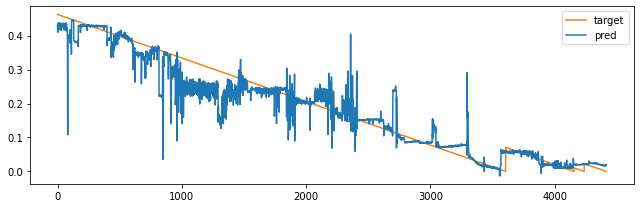

In [16]:
framework.print_prediction_on_set(test_set,40000)